In [1]:
import torch 
from GMVAE_beta import GMVAE
import dataloader as dl 
dev=torch.device("cuda")


In [2]:
gmvae = GMVAE()

In [5]:
gmvae.load_state_dict(torch.load("./models/gmvae.pth"))
gmvae.eval()

GMVAE(
  (encConvStack): Sequential(
    (0): Conv2d(1, 16, kernel_size=(6, 6), stride=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 32, kernel_size=(6, 6), stride=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
  )
  (fcStack): Sequential(
    (0): Linear(in_features=4096, out_features=500, bias=False)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (mu_x): Linear(in_features=500, out_features=200, bias=True)
  (logvar_x): Linear(in_features=500, out_features=200, bias=True)
  (mu_w): Linear(in_features=500, out_features=150, bias=True)
  (logvar_w): Linear(in_

In [6]:
_ , test_loader = dl.mnistloader(batchSize=64)

In [9]:
Z = []
targ = []
for batch_idx, (data, target) in enumerate(test_loader):
	data = data
	
	target = target

	qz, mu_x, logvar_x, mu_w, logvar_w = gmvae.encode(data)

	Z.append(mu_x)
	targ.append(target)

In [10]:
z = torch.stack([item for item in Z[:-1]])
cat = torch.stack([item for item in targ[:-1]])

In [11]:
cat = cat.flatten()
zz = z.reshape(156*64,200)

In [12]:
latent = zz.detach().numpy()
cat = cat.numpy()

In [13]:
from sklearn.manifold import TSNE
import numpy as np
latent_embeded = TSNE(n_components=2, init="random").fit_transform( np.asarray(latent, dtype='float64'))

In [18]:
import matplotlib.pyplot as plt 
from pylab import *
cmap = cm.get_cmap('PiYG', 10) 

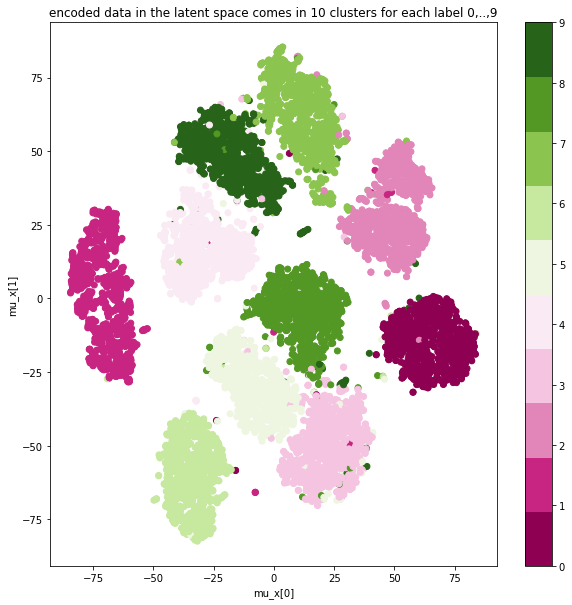

In [19]:
figure = plt.figure(figsize=(10,10))
plt.scatter(latent_embeded[:,0], latent_embeded[:,1], c=cat[:], cmap=cmap)
plt.colorbar()
plt.xlabel("mu_x[0]")
plt.ylabel("mu_x[1]")
plt.title("encoded data in the latent space comes in 10 clusters for each label 0,..,9")
plt.show()

In [20]:
x_hat = gmvae.decoder(Z[0])

In [21]:
z_rand = torch.randn(Z[0].shape)

In [22]:
x_rand = gmvae.decoder(z_rand)

In [23]:
x_hat = x_hat.detach().numpy()

In [24]:
x_rand = x_rand.detach().numpy()

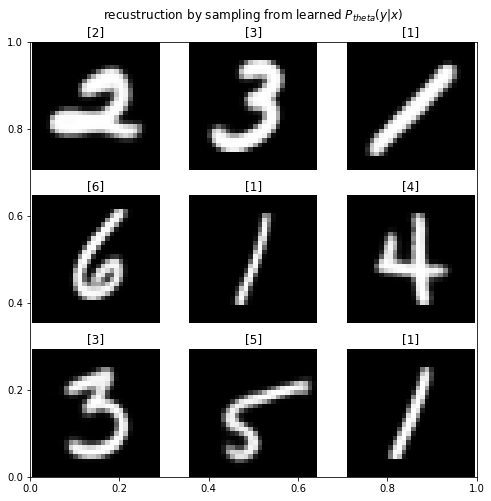

In [29]:

figure = plt.figure(figsize=(8,8))
plt.title("recustruction by sampling from learned $P_{theta}(y|x)$\n")
row, col = 3, 3 
for i in range(1, row * col +1):
    sample_index = np.random.randint(len(x_hat), size=(1,))
    img = x_hat[sample_index].reshape(28,28)
    # img = img[2]
    figure.add_subplot(row, col, i)
    plt.title(cat[sample_index])
    plt.axis("off")
    plt.imshow(img, cmap="gray")

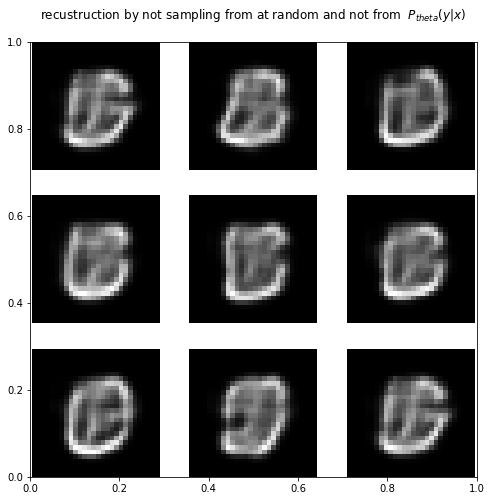

In [32]:
figure = plt.figure(figsize=(8,8))
plt.title("recustruction by not sampling from at random and not from  $P_{theta}(y|x)$\n")
row, col = 3, 3 
for i in range(1, row * col +1):
    sample_index = np.random.randint(len(x_rand), size=(1,))
    img = x_rand[sample_index].reshape(28,28)
    # img = img[2]
    figure.add_subplot(row, col, i)
    # plt.title(cat[sample_index])
    plt.axis("off")
    plt.imshow(img, cmap="gray")